# Flattening an image 

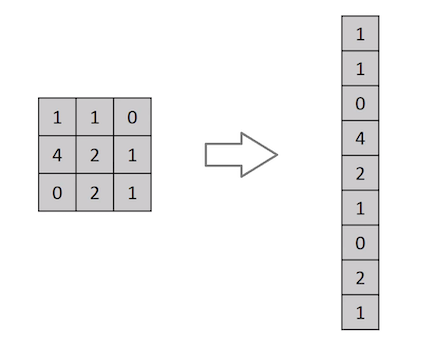

# convolutions 3*3

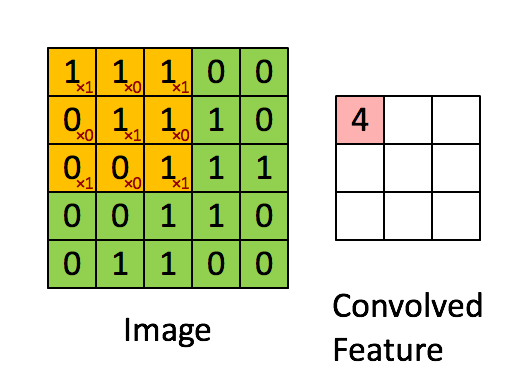

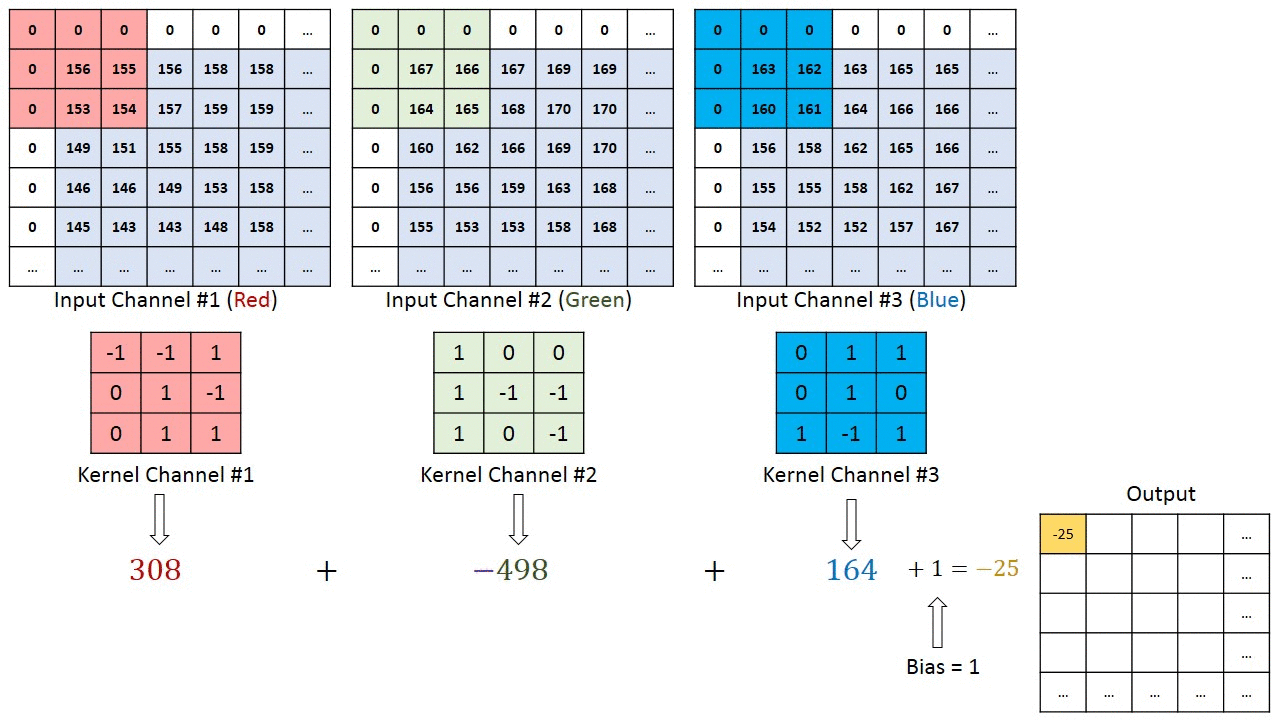

# maxpooling

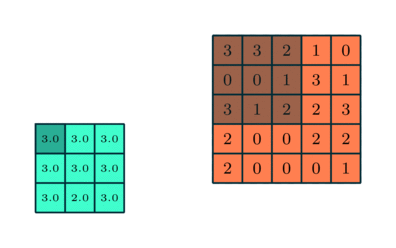

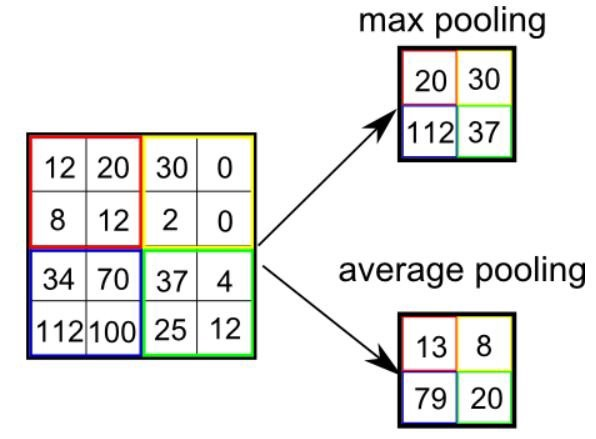 

In [29]:
# from __future__ import print_function
# import keras
# from keras.datasets import cifar10
# from keras.preprocessing.image import ImageDataGenerator
# from keras.models import Sequential
# from keras.layers import Dense, Dropout, Activation, Flatten
# from keras.layers import Conv2D, MaxPooling2D
# import os
# import keras.backend as k
# from keras.applications.vgg16 import VGG16
# from keras.applications.vgg16 import preprocess_input
# from keras.preprocessing.image import load_img
# from keras.preprocessing.image import img_to_array
# from keras.models import Model
# from matplotlib import pyplot

In [1]:
import tensorflow as tf

In [2]:
# import keras
# from keras.datasets import mnist
#load mnist dataset
(X_train, y_train), (X_test, y_test) =  tf.keras.datasets.mnist.load_data() #everytime loading data won't be so easy :)

In [4]:
X_train.shape

(60000, 28, 28)

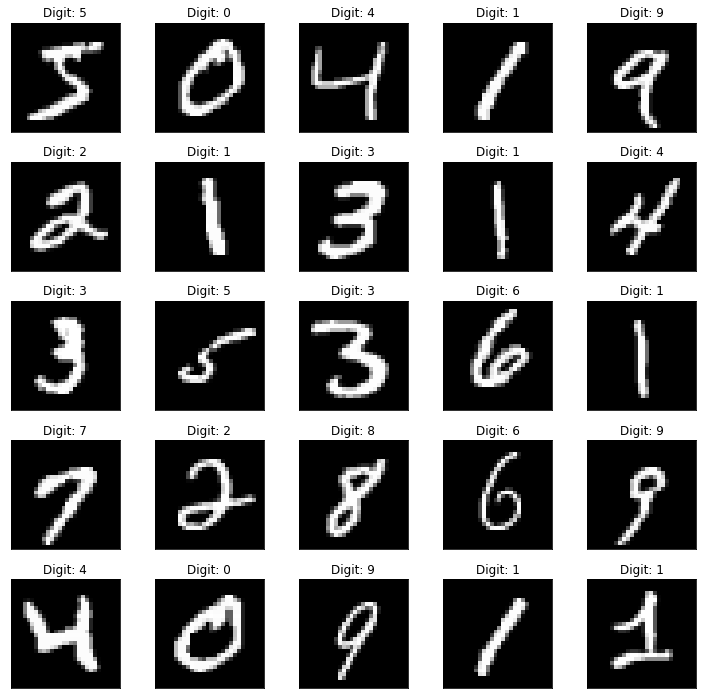

In [7]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])


In [5]:
(60000,1,28,28)
(60000,28,28,1)# this is very general

(60000, 28, 28, 1)

In [7]:
#For 3D data, "channels_last" assumes (conv_dim1, conv_dim2, conv_dim3, channels) while 
#"channels_first" assumes (channels, conv_dim1, conv_dim2, conv_dim3).
img_rows, img_cols=28,28
if tf.keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
#more reshaping
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape) #X_train shape: (60000, 28, 28, 1)

X_train shape: (60000, 28, 28, 1)


In [8]:
input_shape

(28, 28, 1)

In [9]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [10]:

#set number of categories
num_category = 10
# convert class vectors to binary class matrices
# y_train = keras.utils.to_categorical(y_train, num_category)
# y_test = keras.utils.to_categorical(y_test, num_category)

In [11]:
# input  (28,28,1)
# conv1 (3,3)  #32 #26,26,32  #para 10*32
# conv2 (3,3)  #64  #24,24,64 # (9*32+1)*64
# MaxPooling2D (2,2) strides=1
# model.add(Dropout(0.25))
# #a,b,c
# flatten length a*b*c #24*24*64
# dense1 128 #128 #128*(24*24*64)+128
# model.add(Dropout(0.5))
# dense2 10 #128*10+10




In [36]:
model = tf.keras.models.Sequential()
#convolutional layer with rectified linear unit activation
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
#32 convolution filters used each of size 3x3
#again
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
#64 convolution filters used each of size 3x3
#choose the best features via pooling
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2),strides=2))
#randomly turn neurons on and off to improve convergence
model.add(tf.keras.layers.Dropout(0.25))
#flatten since too many dimensions, we only want a classification output
model.add(tf.keras.layers.Flatten())
#fully connected to get all relevant data
model.add(tf.keras.layers.Dense(128, activation='relu'))
#one more dropout for convergence' sake :) 
model.add(tf.keras.layers.Dropout(0.5))
#output a softmax to squash the matrix into output probabilities
model.add(tf.keras.layers.Dense(num_category, activation='softmax'))

In [37]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)              

In [38]:
#Adaptive learning rate (adaDelta) is a popular form of gradient descent rivaled only by adam and adagrad
#categorical ce since we have multiple classes (10) 
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adadelta(),
              metrics=['accuracy'])


In [19]:
batch_size = 128
num_epoch = 10
#model training
model_log = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=num_epoch,
          verbose=1,
          validation_data=(X_test, y_test))

Epoch 1/10
469/469 [==============================] - 39s 82ms/step - loss: 2.2839 - accuracy: 0.1433 - val_loss: 2.2491 - val_accuracy: 0.2871
Epoch 2/10
469/469 [==============================] - 40s 86ms/step - loss: 2.2291 - accuracy: 0.2536 - val_loss: 2.1816 - val_accuracy: 0.5330
Epoch 3/10
469/469 [==============================] - 41s 87ms/step - loss: 2.1613 - accuracy: 0.3686 - val_loss: 2.0945 - val_accuracy: 0.6551
Epoch 4/10
469/469 [==============================] - 37s 78ms/step - loss: 2.0687 - accuracy: 0.4555 - val_loss: 1.9769 - val_accuracy: 0.7100
Epoch 5/10
469/469 [==============================] - 37s 78ms/step - loss: 1.9470 - accuracy: 0.5174 - val_loss: 1.8204 - val_accuracy: 0.7492
Epoch 6/10
469/469 [==============================] - 37s 79ms/step - loss: 1.7968 - accuracy: 0.5564 - val_loss: 1.6294 - val_accuracy: 0.7688
Epoch 7/10
469/469 [==============================] - 36s 78ms/step - loss: 1.6235 - accuracy: 0.5940 - val_loss: 1.4215 - val_accuracy:

In [37]:
model.layers

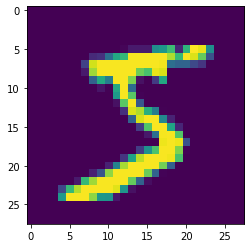

In [20]:
plt.imshow(X_train[0][:,:,0])


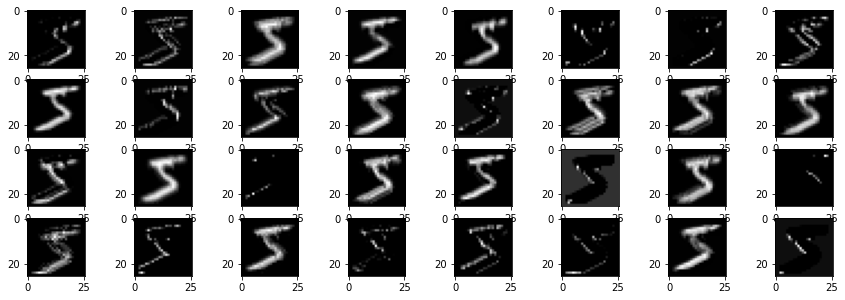

In [21]:
model2 = tf.keras.models.Model(inputs=model.inputs, outputs=model.layers[0].output)
#model2.summary()
feature_maps = model2.predict(X_train[0:1])
plt.figure(figsize=(15,10))
for i in range(feature_maps.shape[-1]):
       plt.subplot(8,8,i+1)
       plt.imshow(feature_maps[0][:,:,i],cmap="gray")
plt.show()    

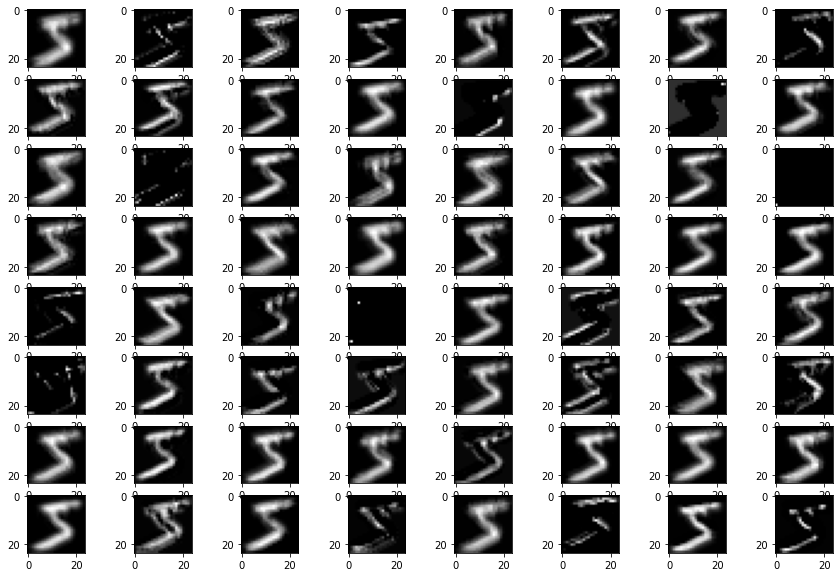

In [23]:
model2 =tf.keras.models.Model(inputs=model.inputs, outputs=model.layers[1].output)
#model2.summary()
feature_maps = model2.predict(X_train[0:1])
plt.figure(figsize=(15,10))
for i in range(feature_maps.shape[-1]):
       plt.subplot(8,8,i+1)
       plt.imshow(feature_maps[0][:,:,i],cmap="gray")
plt.show()    

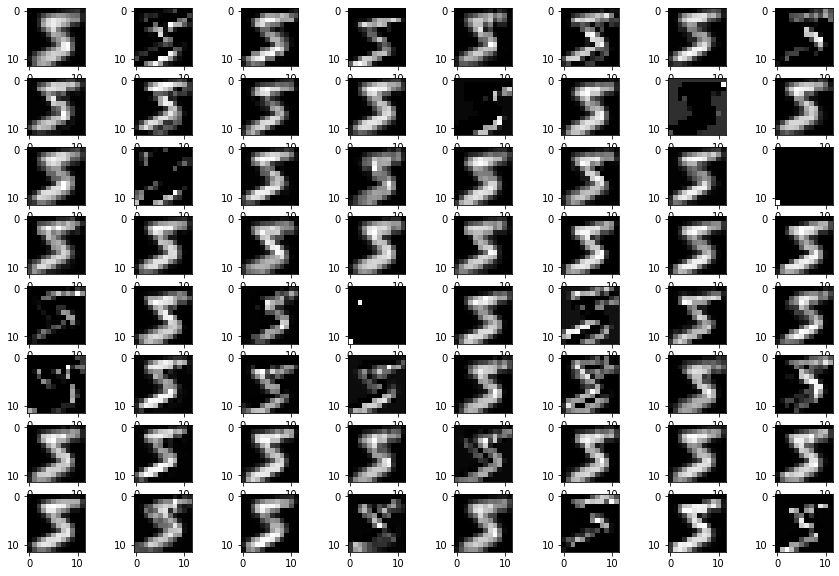

In [24]:
model2 = tf.keras.models.Model(inputs=model.inputs, outputs=model.layers[2].output)
#model2.summary()
feature_maps = model2.predict(X_train[0:1])
plt.figure(figsize=(15,10))
for i in range(feature_maps.shape[-1]):
       plt.subplot(8,8,i+1)
       plt.imshow(feature_maps[0][:,:,i],cmap="gray")
plt.show()    

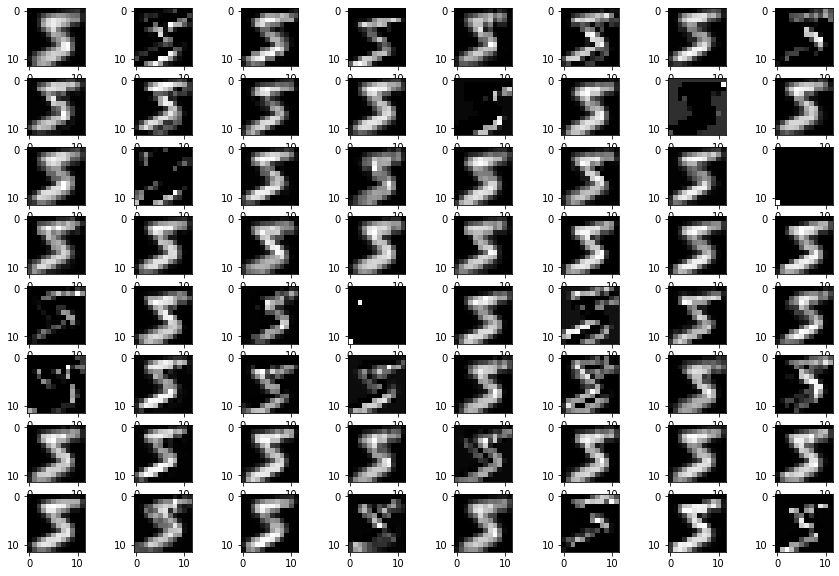

In [25]:
model2 = tf.keras.models.Model(inputs=model.inputs, outputs=model.layers[3].output)
#model2.summary()
feature_maps = model2.predict(X_train[0:1])
plt.figure(figsize=(15,10))
for i in range(feature_maps.shape[-1]):
       plt.subplot(8,8,i+1)
       plt.imshow(feature_maps[0][:,:,i],cmap="gray")
plt.show()    

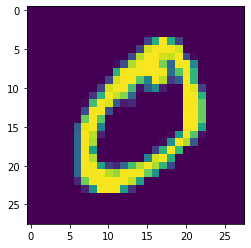

In [32]:
plt.imshow(X_train[1][:,:,0])

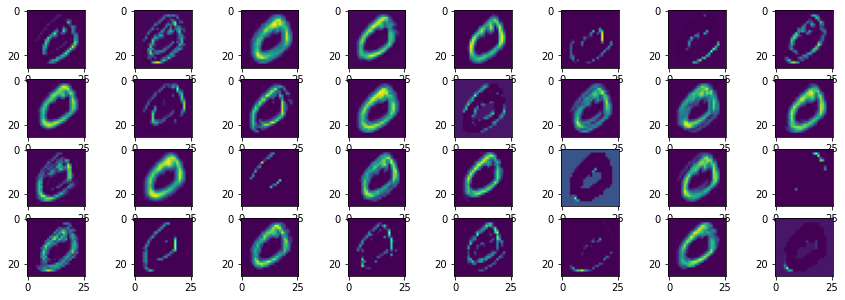

In [26]:
model2 = tf.keras.models.Model(inputs=model.inputs, outputs=model.layers[0].output)
#model2.summary()
feature_maps = model2.predict(X_train[1:2])
plt.figure(figsize=(15,10))
for i in range(feature_maps.shape[-1]):
       plt.subplot(8,8,i+1)
       plt.imshow(feature_maps[0][:,:,i])
plt.show()    

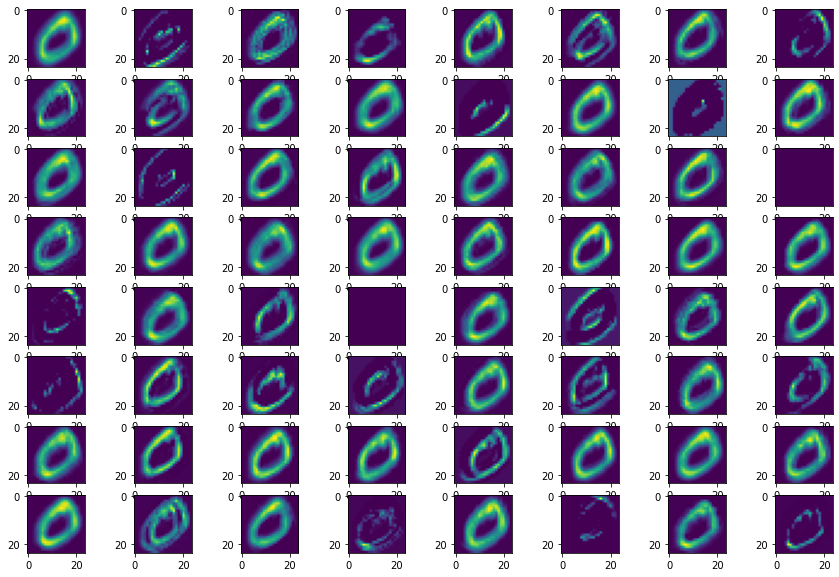

In [27]:
model2 = tf.keras.models.Model(inputs=model.inputs, outputs=model.layers[1].output)
#model2.summary()
feature_maps = model2.predict(X_train[1:2])
plt.figure(figsize=(15,10))
for i in range(feature_maps.shape[-1]):
       plt.subplot(8,8,i+1)
       plt.imshow(feature_maps[0][:,:,i])
plt.show()    

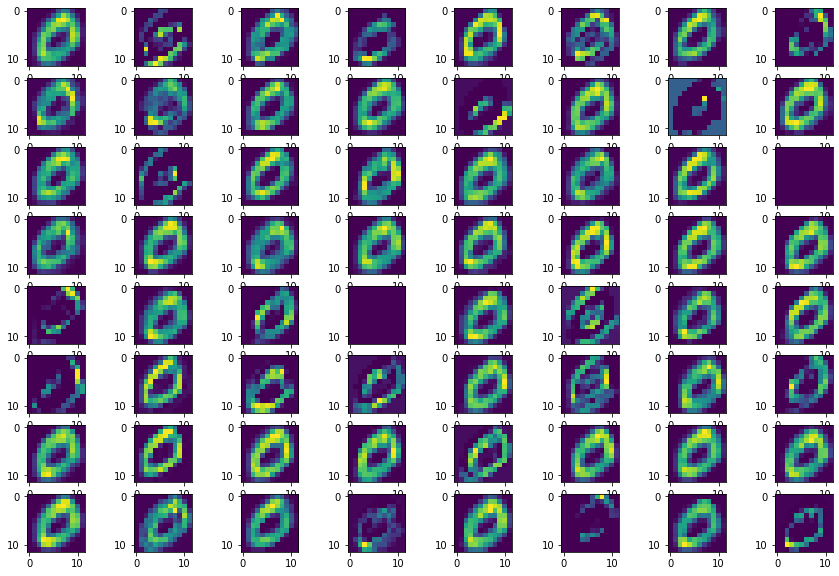

In [28]:
model2 = tf.keras.models.Model(inputs=model.inputs, outputs=model.layers[2].output)
#model2.summary()
feature_maps = model2.predict(X_train[1:2])
plt.figure(figsize=(15,10))
for i in range(feature_maps.shape[-1]):
       plt.subplot(8,8,i+1)
       plt.imshow(feature_maps[0][:,:,i])
plt.show()    

# object detection

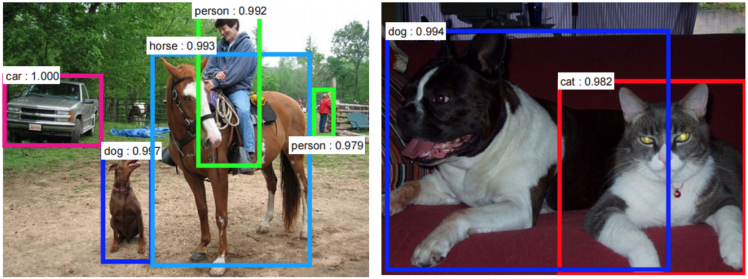

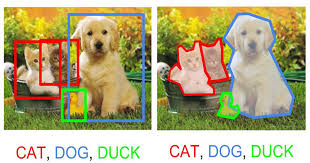

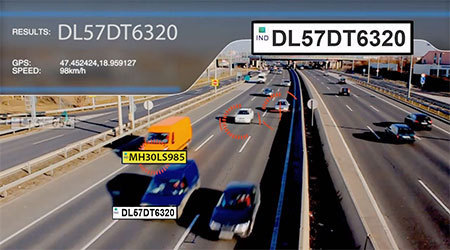# 